# *Analysis 10: Union*

The **analyses performed** on the **9 previous datasets**, although detailed, did not include merging the various datasets. We will use **foreign keys** to **link different datasets** and **extract additional information**.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import folium
import time
import sys
sys.path.insert(0, '../')

Merging the **datasets** creates tables that represent a vast amount of information. Visualizing these on graphs becomes challenging. An intelligent solution is to analyze **players** and/or **clubs** individually, allowing for **specific analyses** on particular teams or players.

We will therefore proceed with **reading the datasets** and merging them using **foreign keys**. We will start by analyzing the datasets that offer more analysis: **competitions**, **games**, and **clubgames**.


In [2]:
competitions = pd.read_csv('../Datasets/competitions.csv')
games = pd.read_csv('../Datasets/games.csv')
club_games = pd.read_csv('../Datasets/club_games.csv')
games_competitions = games.merge(competitions, left_on='competition_id', right_on='competition_id', how='left')

games_competitions_clubgames = games_competitions.merge(club_games, left_on='game_id', right_on='game_id', how='left')

Before performing the analyses, it is necessary to handle **null** values.
We start with *checking* the **data types** to make substitutions that do not cause **inconsistencies**.
Subsequently, the substitutions made will allow us to **exclude** certain values during the analyses.


In [3]:
print(games_competitions_clubgames.dtypes)

game_id                     int64
competition_id             object
season                      int64
round                      object
date                       object
home_club_id                int64
away_club_id                int64
home_club_goals             int64
away_club_goals             int64
home_club_position        float64
away_club_position        float64
home_club_manager_name     object
away_club_manager_name     object
stadium                    object
attendance                float64
referee                    object
url_x                      object
home_club_formation        object
away_club_formation        object
home_club_name             object
away_club_name             object
aggregate                  object
competition_type           object
competition_code           object
name                       object
sub_type                   object
type                       object
country_id                  int64
country_name               object
domestic_leagu

Proceed with checking for **null** values.


In [4]:
games_competitions_clubgames.isnull().sum()

game_id                        0
competition_id                 0
season                         0
round                          0
date                           0
home_club_id                   0
away_club_id                   0
home_club_goals                0
away_club_goals                0
home_club_position         38908
away_club_position         38908
home_club_manager_name      1484
away_club_manager_name      1484
stadium                      422
attendance                 19024
referee                     1188
url_x                          0
home_club_formation       124694
away_club_formation       124656
home_club_name             22504
away_club_name             20098
aggregate                      0
competition_type               0
competition_code               0
name                           0
sub_type                       0
type                           0
country_id                     0
country_name               16276
domestic_league_code       16276
confederat

Now that we know the null values, we can proceed with **substitutions** while respecting the data types.

In [5]:
from Utils.JoinAndGeneral import fill_missing_values

fill_missing_values(games_competitions_clubgames)

game_id                   0
competition_id            0
season                    0
round                     0
date                      0
home_club_id              0
away_club_id              0
home_club_goals           0
away_club_goals           0
home_club_position        0
away_club_position        0
home_club_manager_name    0
away_club_manager_name    0
stadium                   0
attendance                0
referee                   0
url_x                     0
home_club_formation       0
away_club_formation       0
home_club_name            0
away_club_name            0
aggregate                 0
competition_type          0
competition_code          0
name                      0
sub_type                  0
type                      0
country_id                0
country_name              0
domestic_league_code      0
confederation             0
url_y                     0
club_id                   0
own_goals                 0
own_position              0
own_manager_name    

Create a **combination chart** that shows the **club's performance** in different competitions, using two separate y-axes.  
The **bar chart** represents the **goal difference** (goals scored minus goals conceded) per season and competition, while the **line chart** represents the **number of victories**. Use a distinct color palette to enhance readability and understanding of the different competitions.  
The chart thus helps to understand the performance of clubs over time for different competitions across various seasons.  
In this specific case, analyze the **performance of Inter** (club with ID 46).


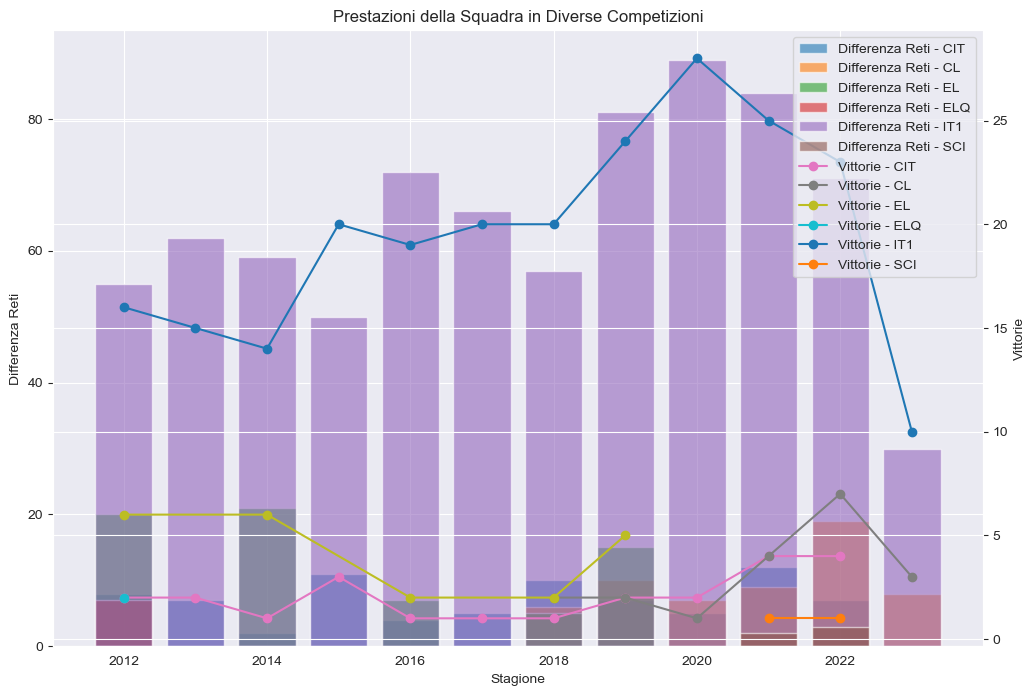

In [6]:
from Utils.JoinAndGeneral import filter_and_aggregate_data, plot_team_performance

club_id = 46
filtered_df = games_competitions_clubgames[games_competitions_clubgames['club_id'] == club_id]
team_performance = filter_and_aggregate_data(games_competitions_clubgames, club_id)
plot_team_performance(team_performance)
plt.show() 

The **heatmap** below helps to quickly visualize the **number of victories per season** for **club 46**, highlighting differences over time and facilitating comparison between seasons.  
In the specific case of **Inter** (club with ID 46), the **best season** was **2022**.


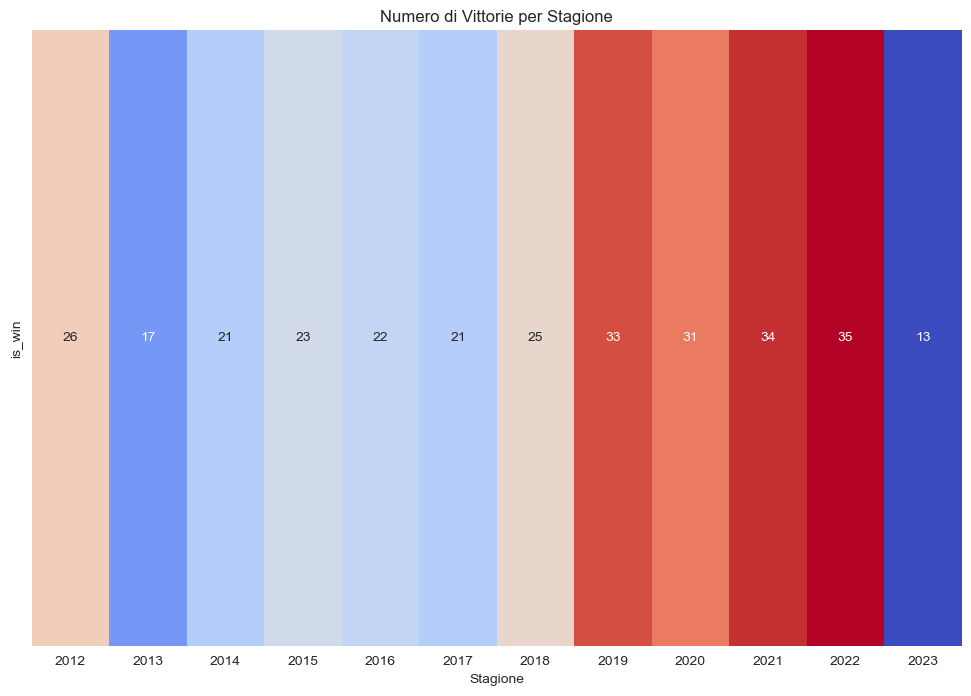

In [7]:
wins_per_season = filtered_df.groupby('season')['is_win'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(wins_per_season.pivot_table(values='is_win', index='season', aggfunc='sum').T, annot=True, cmap='coolwarm', cbar=False)
plt.xlabel('Stagione') 
plt.title('Numero di Vittorie per Stagione')  
plt.show() 

Now use a **Violin Plot**: it shows the **distribution of goals scored at home and away per match** in each season. It displays the **quartiles of the distribution**, the **median**, and the **probability density** of the data. These help to understand the **variability of goals scored at home and away** across different seasons.


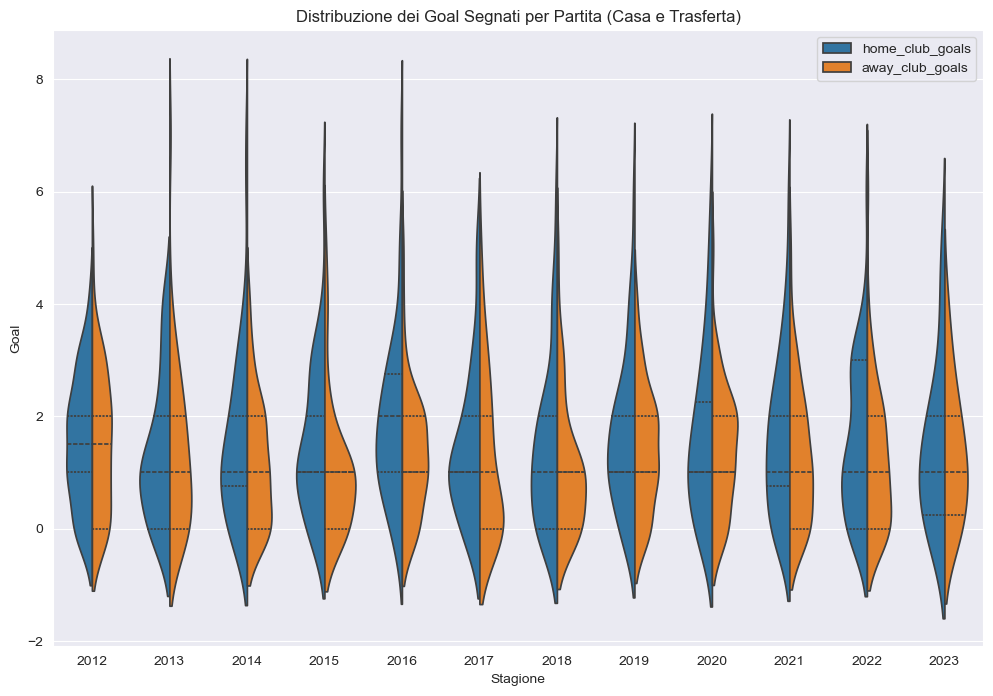

In [8]:
from Utils.JoinAndGeneral import create_violin_plot

create_violin_plot(filtered_df)
plt.show()

For the **club** we are analyzing, given the amount of **numerical data**, we can visualize the **correlation between various metrics**: goals scored at home and away, the league position at home and away, and whether the match was won or not.  
Reading the graph (**Scatter Plot Matrix**) reveals that:
- The cells comparing **is_win** with **home_club_goals** and **away_club_goals** show a clear trend: when the club scores more goals at home or away, it is more likely to win the match.
- The cells comparing **home_club_position** and **away_club_position** with the goals scored show that **better positions** (lower numbers) tend to be associated with a higher number of goals scored.


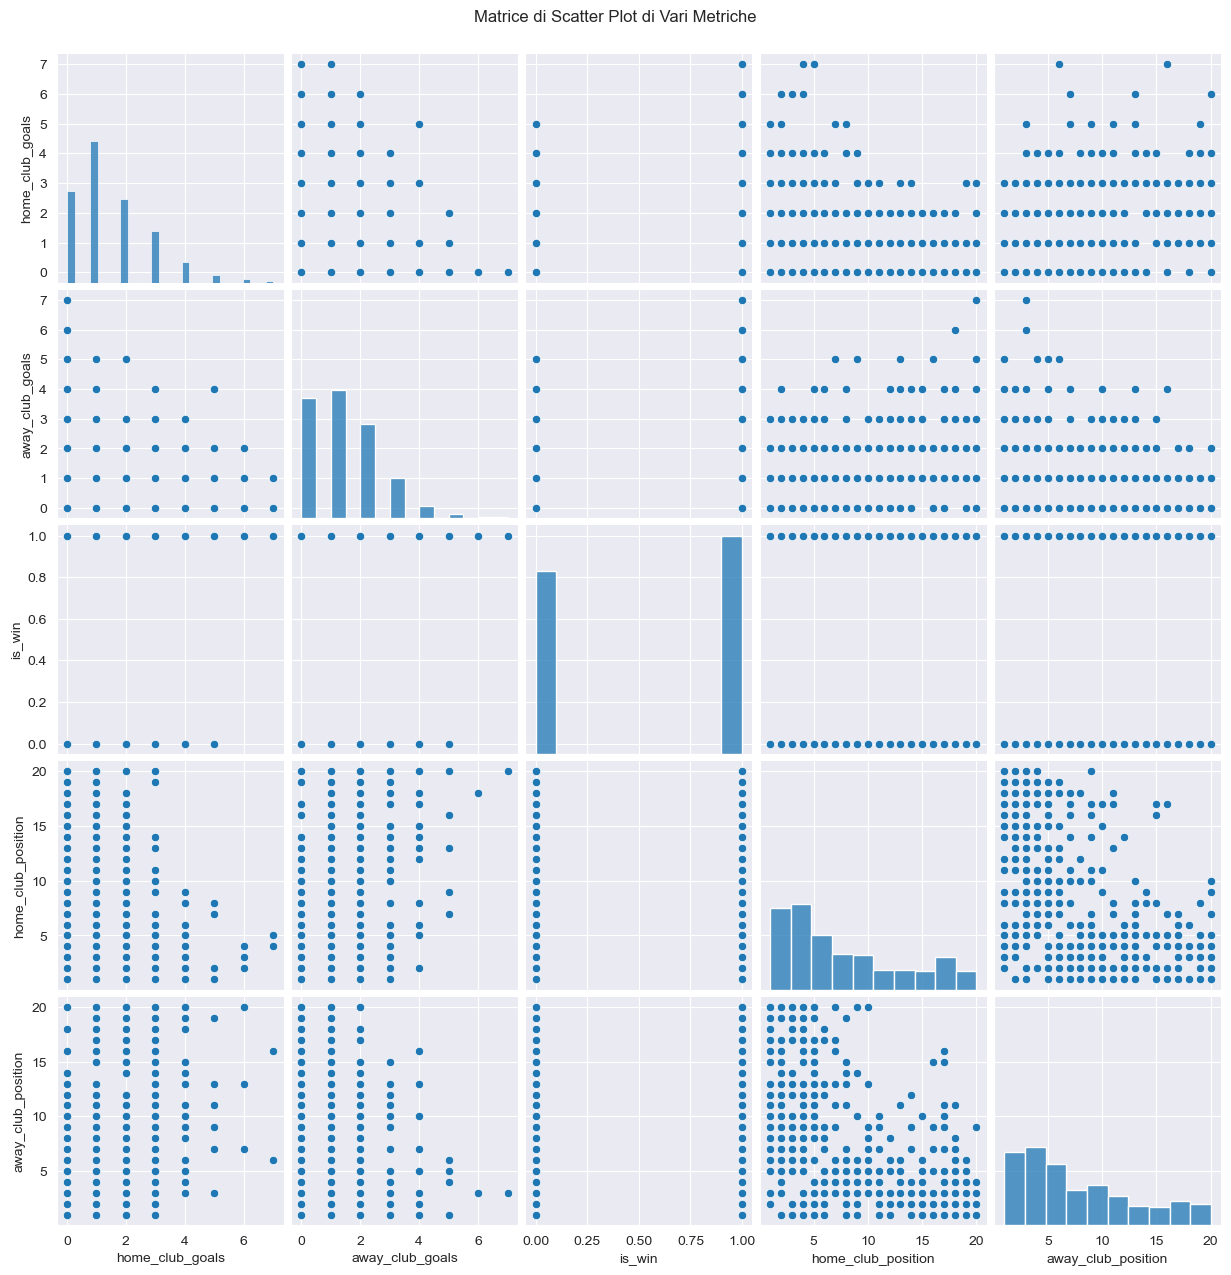

In [9]:
from Utils.JoinAndGeneral import create_scatter_matrix

create_scatter_matrix(filtered_df)
plt.show()

Proceed with reading additional datasets.

In [10]:
players = pd.read_csv('../Datasets/players.csv')  
appearances = pd.read_csv('../Datasets/appearances.csv') 

games_clubgames = games.merge(club_games, on='game_id', how='left') 

games_clubgames_players = games_clubgames.merge(players, left_on='club_id', right_on='current_club_id', how='left')  

combined_df = games_clubgames_players.merge(appearances, on=['game_id', 'player_id'], how='left')  


Perform the necessary data cleaning operations here as well.

In [11]:
combined_df.dtypes

game_id               int64
competition_id_x     object
season                int64
round                object
date_x               object
                     ...   
yellow_cards        float64
red_cards           float64
goals               float64
assists             float64
minutes_played      float64
Length: 67, dtype: object

In [12]:
combined_df.isnull().sum()

game_id                   0
competition_id_x          0
season                    0
round                     0
date_x                    0
                     ...   
yellow_cards        8504640
red_cards           8504640
goals               8504640
assists             8504640
minutes_played      8504640
Length: 67, dtype: int64

Proceed with the **replacements** of null values.

In [13]:
from Utils.JoinAndGeneral import fill_missing_values_combined_df

fill_missing_values_combined_df(combined_df)

game_id             0
competition_id_x    0
season              0
round               0
date_x              0
                   ..
yellow_cards        0
red_cards           0
goals               0
assists             0
minutes_played      0
Length: 67, dtype: int64

Performing the **join** **Players-ClubGames-Games-Appearances** allows us to analyze the importance of players within a team.  
In the graph below, we analyze the **contribution of a specific player** (**Lautaro Martinez**) in terms of **goals scored in matches won** for **club 46** (**Inter**). It is also noted that the player scored more goals in the **2022 season** compared to others and has been part of the team since **2018**.


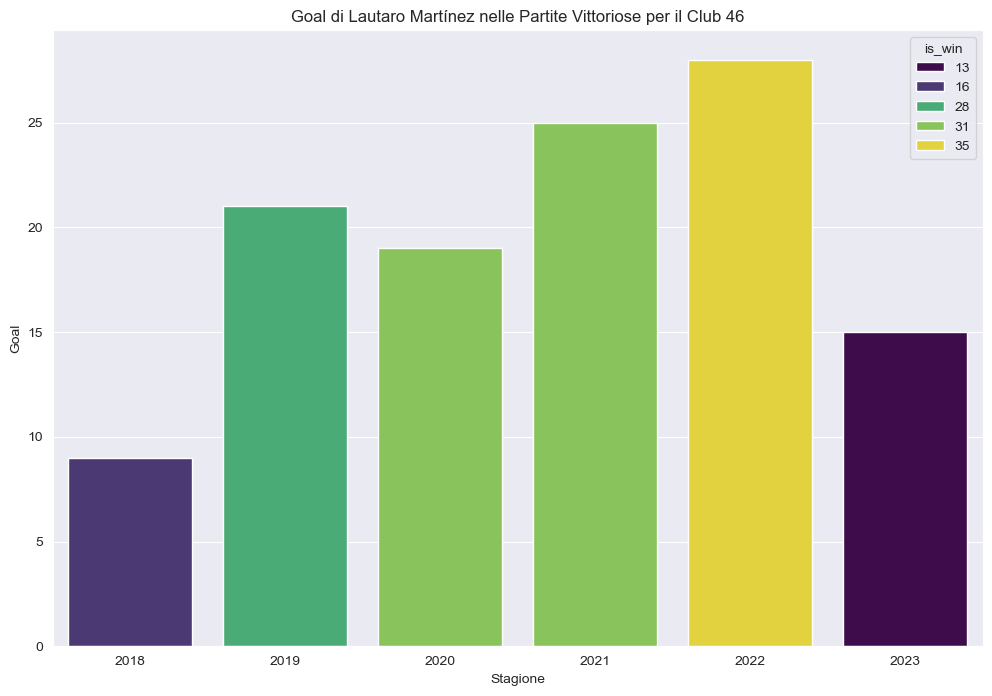

In [14]:
from Utils.JoinAndGeneral import filter_and_aggregate_player_data, plot_player_contributions

player_id = 406625  # Lautaro Martinez
club_id = 46  
filtered_df = combined_df[(combined_df['player_id'] == player_id) & (combined_df['club_id'] == club_id)]
player_contributions = filter_and_aggregate_player_data(combined_df, player_id, club_id)
plot_player_contributions(player_contributions, club_id)
plt.show() 


It is possible to leverage the previously performed dataset joins to analyze the **performance of a specific player over time**.  
In the graph below, the performance of a specific player (**Lautaro Martinez**) is analyzed in terms of **goals**, **assists**, **goals scored at home and away**, **yellow cards**, and **red cards**. Note that this examines the player's **general statistics**, ignoring the **team factor**.


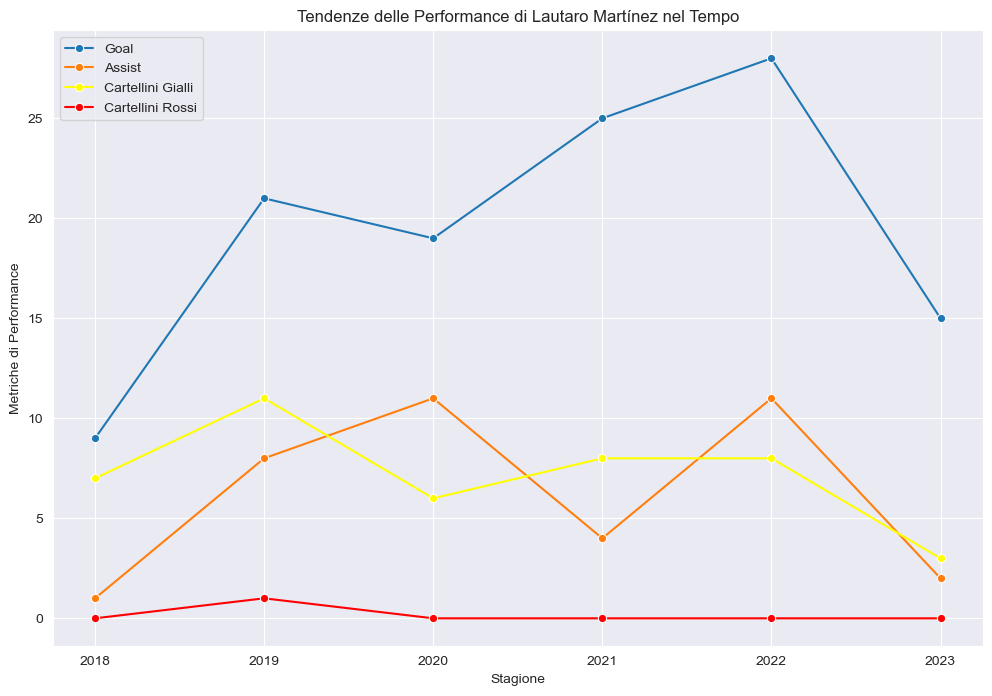

In [15]:
from Utils.JoinAndGeneral import filter_and_aggregate_player_season_data, plot_player_season_performance

player_season_performance = filter_and_aggregate_player_season_data(combined_df, player_id)
plot_player_season_performance(player_season_performance)
plt.show()

Perform additional joins setting aside the datasets previously used. Proceed with reading the datasets.

In [16]:
game_lineups = pd.read_csv('../Datasets/game_lineups.csv')
game_events = pd.read_csv('../Datasets/game_events.csv')
player_valuations = pd.read_csv('../Datasets/player_valuations.csv')
clubs = pd.read_csv('../Datasets/clubs.csv')

An interesting analysis can be performed by joining the **game_lineups** and **game_events** datasets. We can analyze the **impact of a player** for each **position** they have played and how many **events** are associated with that position.  
In this specific case, we analyze the **impact of Evgeniy Kharin**, one of the players in the datasets who has played the most possible positions.


In [17]:
game_lineups_events = game_lineups.merge(game_events, on=['game_id', 'player_id'], how='left')

Let's proceed with **data cleaning** before the analysis.


In [18]:
game_lineups_events.dtypes

game_lineups_id      object
game_id               int64
club_id_x             int64
type_x               object
number               object
player_id             int64
player_name          object
team_captain          int64
position             object
game_event_id        object
date                 object
minute              float64
type_y               object
club_id_y           float64
description          object
player_in_id        float64
player_assist_id    float64
dtype: object

In [19]:
game_lineups_events.isnull().sum()

game_lineups_id          0
game_id                  0
club_id_x                0
type_x                   0
number                   0
player_id                0
player_name              0
team_captain             0
position                 0
game_event_id        79856
date                 79856
minute               79856
type_y               79856
club_id_y            79856
description          83536
player_in_id        102874
player_assist_id    122044
dtype: int64

In [20]:
from Utils.JoinAndGeneral import fill_missing_values_game_lineups_events

fill_missing_values_game_lineups_events(game_lineups_events)

game_lineups_id     0
game_id             0
club_id_x           0
type_x              0
number              0
player_id           0
player_name         0
team_captain        0
position            0
game_event_id       0
date                0
minute              0
type_y              0
club_id_y           0
description         0
player_in_id        0
player_assist_id    0
dtype: int64

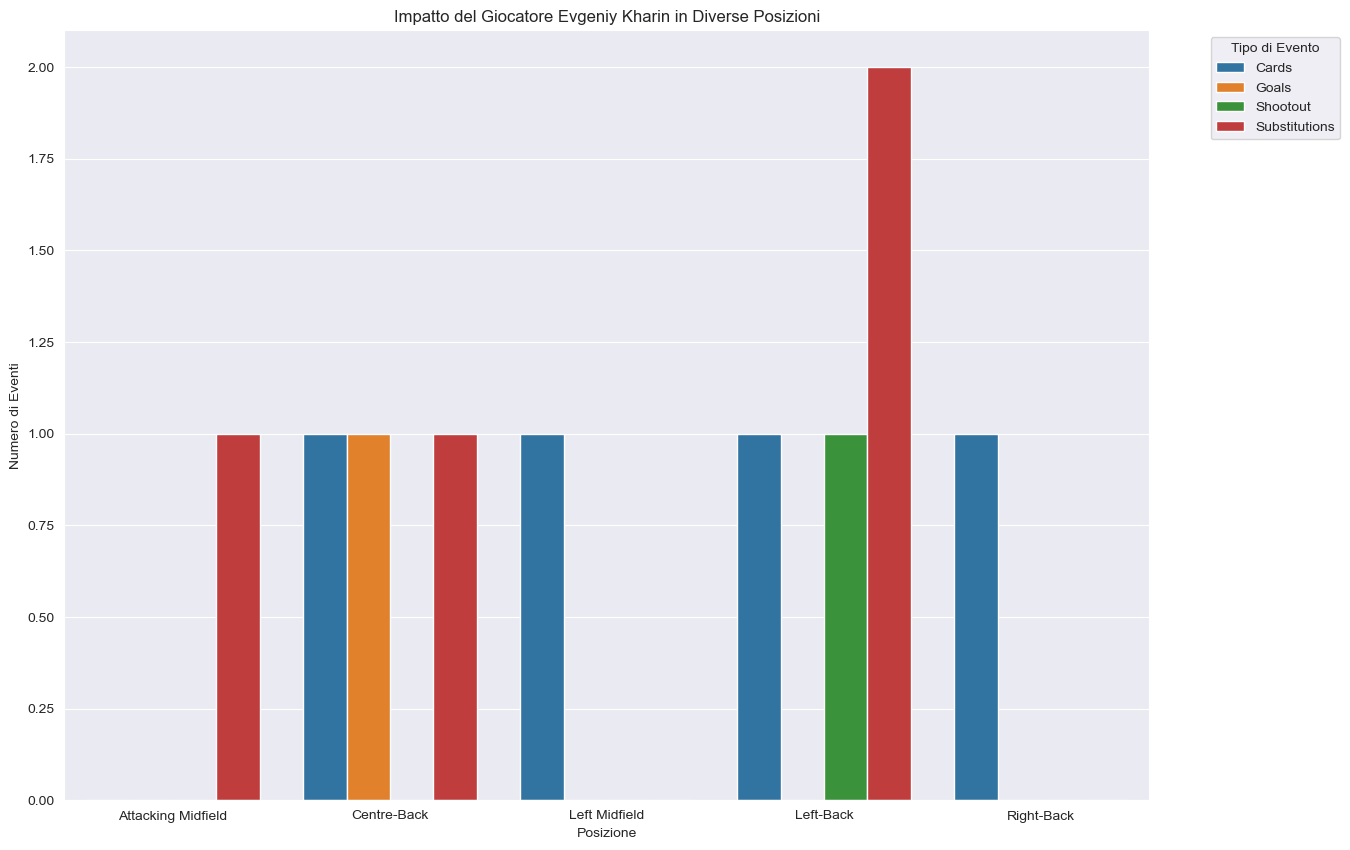

In [21]:
from Utils.JoinAndGeneral import filter_and_aggregate_player_events, plot_player_event_summary

player_id = 193464
player_name = "Evgeniy Kharin"  
player_event_summary = filter_and_aggregate_player_events(game_lineups_events, player_id)
plot_player_event_summary(player_event_summary, player_name)
plt.show()

By merging the **player_valuations** and **clubs** datasets, we can analyze the **player valuation trends** in a **specific club**.  
In this specific case, we analyze the player valuation trends in **Tottenham**.


In [22]:
player_valuations_clubs = player_valuations.merge(clubs, left_on='current_club_id', right_on='club_id', how='left')

player_valuations_clubs = player_valuations_clubs.merge(players[['player_id', 'name']], on='player_id', how='left')

Let's proceed with **data cleaning** before the analysis.

In [23]:
player_valuations_clubs.dtypes

player_id                                int64
last_season_x                            int64
datetime                                object
date                                    object
dateweek                                object
market_value_in_eur                      int64
n                                        int64
current_club_id                          int64
player_club_domestic_competition_id     object
club_id                                  int64
club_code                               object
name_x                                  object
domestic_competition_id                 object
total_market_value                     float64
squad_size                               int64
average_age                            float64
foreigners_number                        int64
foreigners_percentage                  float64
national_team_players                    int64
stadium_name                            object
stadium_seats                            int64
net_transfer_

In [24]:
player_valuations_clubs.isnull().sum()

player_id                                   0
last_season_x                               0
datetime                                    0
date                                        0
dateweek                                    0
market_value_in_eur                         0
n                                           0
current_club_id                             0
player_club_domestic_competition_id         0
club_id                                     0
club_code                                   0
name_x                                      0
domestic_competition_id                     0
total_market_value                     440663
squad_size                                  0
average_age                             24961
foreigners_number                           0
foreigners_percentage                   31088
national_team_players                       0
stadium_name                                0
stadium_seats                               0
net_transfer_record               

In [25]:
from Utils.JoinAndGeneral import fill_missing_values_player_valuations_clubs

fill_missing_values_player_valuations_clubs(player_valuations_clubs)


player_id                              0
last_season_x                          0
datetime                               0
date                                   0
dateweek                               0
market_value_in_eur                    0
n                                      0
current_club_id                        0
player_club_domestic_competition_id    0
club_id                                0
club_code                              0
name_x                                 0
domestic_competition_id                0
total_market_value                     0
squad_size                             0
average_age                            0
foreigners_number                      0
foreigners_percentage                  0
national_team_players                  0
stadium_name                           0
stadium_seats                          0
net_transfer_record                    0
coach_name                             0
last_season_y                          0
url             

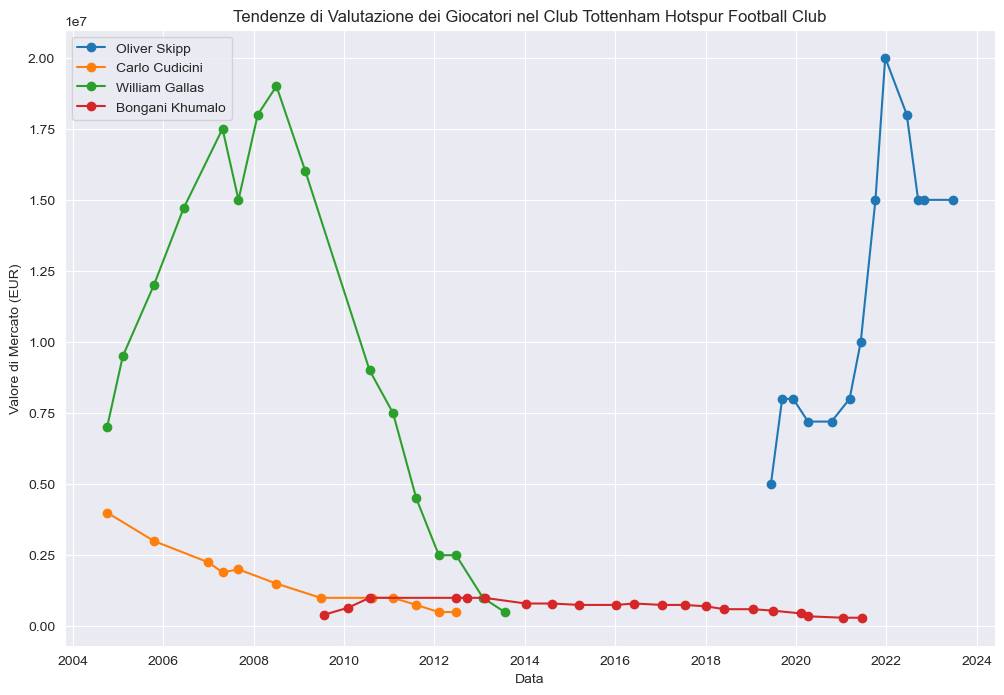

In [26]:
from Utils.JoinAndGeneral import plot_player_valuation_trends

club_id = 148
player_ids = [406638, 3151, 3156, 82215]
club_name = clubs.loc[clubs['club_id'] == club_id, 'name'].values[0]
plot_player_valuation_trends(player_valuations_clubs, club_id, player_ids, club_name)
plt.show()


It is possible to perform a **geographical analysis** using the **stadium names** present in the datasets. With **GeoPandas** and **Geopy**, you can obtain the **geographic coordinates** of the stadiums and visualize them on an **interactive map** (**Folium**).  
We can then visualize which **stadiums** the teams in the datasets play in and display them.


In [28]:
from Utils.JoinAndGeneral import geocode_club_stadiums, create_stadium_map

clubs = geocode_club_stadiums(clubs)
m = create_stadium_map(clubs)